In [1]:
#라이브러리 import
import requests
import pprint
import json
import pandas as pd
import numpy as np


In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',50)

In [3]:
year_map = list(range(2021,2024))
month_map = ['0'+str(i) if i<10 else str(i) for i in range(1,13)]

rc_month = [f'{y}{m}' for y in year_map for m in month_map]

In [5]:
# url 입력
## 배당률 불러오기
"""
meet = 1 # 1: 서울, 2: 제주, 3: 부산
odds = ['WIN', 'QNL','TLA']
rc_no = list(range(1, 16))

cnt_b = 0
for ym in rc_month:
    for o in odds:
        for rc in rc_no:
            try:

                odds_url = f'https://apis.data.go.kr/B551015/API160_1/integratedInfo_1?serviceKey=%2FpKtn0KFociUr9CM316rFT6o8sUrRD8yjSLuICPzxXarC8O%2FrUc1pjHc%2FCpuEwB5r4%2BimnNKYuJEjPKARyZCuw%3D%3D&pageNo=1&numOfRows=10000&pool={o}&rc_month={ym}&rc_no={rc}&meet={meet}&_type=json'

                response = requests.get(odds_url)

                contents = response.text

                ## json을 DataFrame으로 변환하기 ##

                #문자열을 json으로 변경
                json_ob = json.loads(contents)

                # 필요한 내용만 꺼내기
                body = json_ob['response']['body']['items']['item']
            except Exception as e:
                print('e',e)
                continue

            # Dataframe으로 만들기
            dataframe = pd.json_normalize(body)

            df_odds = dataframe if cnt_b == 0 else pd.concat([df_odds, dataframe], axis=0)
            cnt_b +=1

df_odds.to_csv('odds_2021_2023.csv', index=False)
"""

"\nmeet = 1 # 1: 서울, 2: 제주, 3: 부산\nodds = ['WIN', 'QNL','TLA']\nrc_no = list(range(1, 16))\n\ncnt_b = 0\nfor ym in rc_month:\n    for o in odds:\n        for rc in rc_no:\n            try:\n\n                odds_url = f'https://apis.data.go.kr/B551015/API160_1/integratedInfo_1?serviceKey=%2FpKtn0KFociUr9CM316rFT6o8sUrRD8yjSLuICPzxXarC8O%2FrUc1pjHc%2FCpuEwB5r4%2BimnNKYuJEjPKARyZCuw%3D%3D&pageNo=1&numOfRows=10000&pool={o}&rc_month={ym}&rc_no={rc}&meet={meet}&_type=json'\n\n                response = requests.get(odds_url)\n\n                contents = response.text\n\n                ## json을 DataFrame으로 변환하기 ##\n\n                #문자열을 json으로 변경\n                json_ob = json.loads(contents)\n\n                # 필요한 내용만 꺼내기\n                body = json_ob['response']['body']['items']['item']\n            except Exception as e:\n                print('e',e)\n                continue\n\n            # Dataframe으로 만들기\n            dataframe = pd.json_normalize(body)\n\n            df_odds

In [7]:
meet = 1 # 1: 서울, 2: 제주, 3: 부산
rc_no = list(range(1, 16))

## 경기 정보 불러오기
cnt = 0
for ym in rc_month:
    for rc in rc_no:
        try:
            detail_url = f'https://apis.data.go.kr/B551015/API4_2/raceResult_2?serviceKey=%2FpKtn0KFociUr9CM316rFT6o8sUrRD8yjSLuICPzxXarC8O%2FrUc1pjHc%2FCpuEwB5r4%2BimnNKYuJEjPKARyZCuw%3D%3D&pageNo=1&numOfRows=10000&meet={meet}&&rc_month={ym}&rc_no={rc}&_type=json'

            response = requests.get(detail_url)

            contents = response.text

            ## json을 DataFrame으로 변환하기 ##
            #문자열을 json으로 변경
            json_ob = json.loads(contents)

            # 필요한 내용만 꺼내기
            body = json_ob['response']['body']['items']['item']
        except Exception as e:
            print('e',e)
            continue

        # pandas import

        # Dataframe으로 만들기
        dataframe = pd.json_normalize(body)
        if 0 in dataframe.ord.unique():
            continue
        else:
            drop_n = np.sum(dataframe.ord.unique() > 90)
            if drop_n > 3:
                continue
            elif drop_n <= 3:
                dataframe = dataframe.drop(list(dataframe[dataframe['ord']>90].index))

            df_all = dataframe if cnt == 0 else pd.concat([df_all, dataframe], axis=0)
            cnt +=1

e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indic

In [47]:
df_all.reset_index(drop=True, inplace=True)

In [48]:
busan_info = list()
jeju_info = list()
seoul_info = list()
snj = list()

for c in df_all.columns:
    if ('buG' in c) or ('buS' in c) or ('bu_' in c) :
        busan_info.append(c)

    elif ('jeG' in c) or ('jeS' in c) or ('je_' in c) :
        jeju_info.append(c)
    
    elif ('seG' in c) or ('seS' in c) or ('se_' in c) :
        seoul_info.append(c)
    
    elif ('sj' in c):
        snj.append(c)

In [50]:
df = df_all.copy()
if meet==1:
    busan_info.extend(jeju_info)
    df.drop(busan_info, axis=1, inplace=True)
elif meet==2:
    busan_info.extend(seoul_info)
    df.drop(busan_info, axis=1, inplace=True)
else:
    seoul_info.extend(jeju_info)
    df.drop(seoul_info, axis=1, inplace=True)
    df.drop(snj, axis=1, inplace=True)

In [51]:
df

age ageCond budam  buga1  buga2  buga3  chaksun1  chaksun2  chaksun3  \
0        3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
1        3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
2        3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
3        3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
4        3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
...    ...     ...   ...    ...    ...    ...       ...       ...       ...   
27360    7    연령오픈   핸디캡      0      0      0  49500000  19800000  12600000   
27361    6    연령오픈   핸디캡      0      0      0  49500000  19800000  12600000   
27362    6    연령오픈   핸디캡      0      0      0  49500000  19800000  12600000   
27363    6    연령오픈   핸디캡      0      0      0  49500000  19800000  12600000   
27364    6    연령오픈   핸디캡      0      0      0  49500000  19800000  12600000   

       chaksun4  chaksun5  chulNo diffUnit  hrName     hrNo  ilsu jkName  \
0       2420000   1540000       4        -  강서프린세스  0042371     4   안토니오   
1       2420000   1540000       2        4   스틸더패션  0042584     4     먼로   
2       2420000   1540000       1        4    농본바다  0043125     4    김효정   
3       2420000   1540000       7       1¾    방탄여걸  0043346     4    김아현   
4       2420000   1540000      12        3    팬시팬츠  0043204     4    송재철   
...         ...       ...     ...      ...     ...      ...   ...    ...   
27360   4500000   3600000       8        2     금로열  0038851    57    김정준   
27361   4500000   3600000       9        4    라온패션  0041304    57    김태희   
27362   4500000   3600000       3        ¾    록의제왕  0043550    57    조상범   
27363   4500000   3600000      10       머리    문학보스  0043482    57    김동수   
27364   4500000   3600000       4       머리   레이디켈리  0041476    57    최범현   

         jkNo meet name  ord    owName    owNo  plcOdds prizeCond  rank  \
0      080576   서울   한국    1  (주)디알엠씨티  114026   9999.9      R0~0  국6등급   
1      080593   서울   한국    2       임동현  119010   9999.9      R0~0  국6등급   
2      080578   서울   한국    3       김용래  065012   9999.9      R0~0  국6등급   
3      080598   서울   한국    4       김태권  112044   9999.9      R0~0  국6등급   
4      080513   서울   한국    5       윤지중  104100   9999.9      R0~0  국6등급   
...       ...  ...  ...  ...       ...     ...      ...       ...   ...   
27360  080473   서울   한국    7       배태곤  105231     12.4     R1~80   2등급   
27361  080603   서울   한국    8       손천수  106025      8.6     R1~80   2등급   
27362  080533   서울   미국    9       정영식  104154      9.8     R1~80   2등급   
27363  080529   서울   미국   10       권경자  105222      3.0     R1~80   2등급   
27364  080361   서울   한국   11     (주)인펨  113038      7.5     R1~80   2등급   

       rating    rcDate rcDay  rcDist rcName  rcNo  rcTime  seG1fAccTime  \
0           0  20210129   금요일    1000     일반     1    60.6          47.8   
1           0  20210129   금요일    1000     일반     1    61.3          48.6   
2           0  20210129   금요일    1000     일반     1    62.0          48.7   
3           0  20210129   금요일    1000     일반     1    62.3          49.7   
4           0  20210129   금요일    1000     일반     1    62.8          48.9   
...       ...       ...   ...     ...    ...   ...     ...           ...   
27360      70  20230805   토요일    1400     일반    15    87.4          73.3   
27361      70  20230805   토요일    1400     일반    15    88.0          73.0   
27362      68  20230805   토요일    1400     일반    15    88.2          74.0   
27363      69  20230805   토요일    1400     일반    15    88.2          73.7   
27364      79  20230805   토요일    1400     일반    15    88.2          73.0   

       seG3fAccTime  seS1fAccTime  se_1cAccTime  se_2cAccTime  se_3cAccTime  \
0              23.8          13.3           0.0           0.0          13.3   
1              24.8          13.9           0.0           0.0          13.9   
2              24.3          13.6           0.0           0.0          13.6   
3              

In [52]:
non_valid = ['ageCond', 'budam', 'buga1', 'buga2', 'buga3','hrName','jkName','jkNo','meet','owName','owNo','plcOdds', 'rcName','trName','trNo']
val_df = df[df.columns.difference(non_valid)] 

In [53]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27365 entries, 0 to 27364
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           27365 non-null  int64  
 1   chaksun1      27365 non-null  int64  
 2   chaksun2      27365 non-null  int64  
 3   chaksun3      27365 non-null  int64  
 4   chaksun4      27365 non-null  int64  
 5   chaksun5      27365 non-null  int64  
 6   chulNo        27365 non-null  int64  
 7   diffUnit      27365 non-null  object 
 8   hrNo          27365 non-null  object 
 9   ilsu          27365 non-null  int64  
 10  name          27365 non-null  object 
 11  ord           27365 non-null  int64  
 12  prizeCond     27365 non-null  object 
 13  rank          27365 non-null  object 
 14  rating        27365 non-null  int64  
 15  rcDate        27365 non-null  int64  
 16  rcDay         27365 non-null  object 
 17  rcDist        27365 non-null  int64  
 18  rcNo          27365 non-nu

In [54]:
val_df.to_csv('racing_info.csv', index=False)

In [55]:
val_df = pd.read_csv('racing_info.csv')
df_odds = pd.read_csv('odds_2021_2023.csv')

In [56]:
val_df[val_df['hrNo']==42371]

age  chaksun1  chaksun2  chaksun3  chaksun4  chaksun5  chulNo diffUnit  \
0        3   8800000   5500000   3740000   2420000   1540000       4        -   
1340     3   8800000   5500000   3740000   2420000   1540000      12        목   
4300     3   8800000   5500000   3740000   2420000   1540000      12        목   
5218     3  17160000   7260000   4620000   2310000   1650000      10        ¾   
6293     3  17160000   7260000   4620000   2310000   1650000       7        -   
7061     3  23400000   9900000   6300000   3150000   2250000       2       머리   
7828     3  33000000  13200000   8400000   3000000   2400000      12        코   
8960     3  33000000  13200000   8400000   3000000   2400000       4        ¾   
10737    4  33000000  13200000   8400000   3000000   2400000       8        5   
13482    4  82500000  33000000  21000000   7500000   6000000      10        ¾   
14512    4  33000000  13200000   8400000   3000000   2400000       2       12   
16132    4  33000000  13200000   8400000   3000000   2400000       7        코   

        hrNo  ilsu name  ord prizeCond   rank  rating    rcDate rcDay  rcDist  \
0      42371     4   한국    1      R0~0   국6등급       0  20210129   금요일    1000   
1340   42371    10   한국    7      R0~0   국6등급       0  20210321   일요일    1200   
4300   42371    34   한국    2      R0~0   국6등급       0  20210619   토요일    1200   
5218   42371    42   한국    5     R1~35   국5등급      30  20210717   토요일    1300   
6293   42371    49   한국    1     R1~35   국5등급      30  20210815   일요일    1300   
7061   42371    59   한국    4     R1~50   국4등급      36  20210919   일요일    1200   
7828   42371    62   한국    3     R1~50   국4등급      36  20211009   토요일    1200   
8960   42371    71   한국    6     R1~50   국4등급      39  20211107   일요일    1200   
10737  42371     1   한국   13     R1~50   국4등급      39  20220108   토요일    1400   
13482  42371    24   한국   11     R0~65  국OPEN      38  20220403   일요일    1400   
14512  42371    32   한국   11     R1~50   국4등급      38  20220501   일요일    1200   
16132  42371    53   한국    3     R1~50   국4등급      38  20220716   토요일    1200   

       rcNo  rcTime  seG1fAccTime  seG3fAccTime  seS1fAccTime  se_1cAccTime  \
0         1    60.6          47.8          23.8          13.3           0.0   
1340      1    77.5          62.6          36.2          13.8           0.0   
4300      2    74.9          61.5          36.4          13.3           0.0   
5218      3    80.9          67.1          42.1          13.2           0.0   
6293      7    81.6          68.1          43.5          13.6           0.0   
7061      7    73.9          60.3          35.7          13.4           0.0   
7828      5    73.5          60.7          36.7          13.8           0.0   
8960      7    74.7          60.9          36.0          13.5           0.0   
10737     6    91.3          75.7          49.2          13.5           0.0   
13482     8    90.0          75.1          49.0          13.9           0.0   
14512     9    79.6          61.7          35.0          13.2           0.0   
16132     8    73.9          61.2          37.0          14.0           0.0   

       se_2cAccTime  se_3cAccTime  se_4cAccTime sex  sjG1fOrd  sjG3fOrd  \
0               0.0          13.3          30.0   암         1         1   
1340            0.0          24.4          42.6   암         3         2   
4300            0.0          24.1          42.8   암         1         1   
5218            0.0          29.9          48.2   암         2         1   
6293            0.0          31.2          49.6   암         2         4   
7061            0.0          24.2          41.8   암         1         1   
7828            0.0          25.0          42.5   암         5         9   
8960            0.0          24.3          42.1   암         3         3   
10737           0.0          36.6          55.7   암        12         3   
13482           0.0          36.4          55.3   암         6         4   
14512           0.0          23.5          41.

In [60]:
def cyclical_encoding(x, max_val):
    sin_val = np.sin(2 * np.pi * x / max_val)
    cos_val = np.cos(2 * np.pi * x / max_val)
    return sin_val, cos_val

def cyclical_decoding(sin_val, cos_val, max_val):
    x = np.arctan2(sin_val, cos_val) * max_val / (2 * np.pi)
    return x

def preprocess(df_in):
    df_out = df_in.copy()

    df_out[['Wg', 'amt']] = df_out.wgHr.str.replace(')','').str.split('(',expand=True)

    df_out['amt'].replace('', np.nan, inplace=True)
    df_out.amt.fillna(0, inplace=True)
    df_out['amt'] = df_out['amt'].astype(int)
    df_out['Wg'] = df_out['Wg'].astype(int)
    df_out.drop(['wgHr'],axis=1, inplace=True)

    df_out[['Humidity_str', 'Humidity']] = df_out.track.str.replace(')','').str.split('(',expand=True)
    df_out.Humidity = df_out.Humidity.str.replace('%','').astype(int)
    df_out.drop(['track'],axis=1, inplace=True)

    df_out['rcDate']= pd.to_datetime(df_out['rcDate'],format="%Y%m%d")
    df_out["year"] = df_out["rcDate"].dt.year
    df_out["month"] = df_out["rcDate"].dt.month
    df_out["day"] = df_out["rcDate"].dt.day
    # df_out.drop('rcDate', axis=1, inplace=True)

    # year 변수를 Cyclical Encoding으로 변환하여 대체하기
    max_year = df_out['year'].max()
    df_out['year_sin'], df_out['year_cos']= cyclical_encoding(df_out['year'], max_year)

    df_out.drop('year', axis=1, inplace=True)

    # month 변수를 Cyclical Encoding으로 변환하여 대체하기
    max_month = 12
    df_out['month_sin'], df_out['month_cos']= cyclical_encoding(df_out['month'], max_month)
    df_out.drop('month', axis=1, inplace=True)

    # day 변수를 Cyclical Encoding으로 변환하여 대체하기
    max_day = 31
    df_out['day_sin'], df_out['day_cos']= cyclical_encoding(df_out['day'], max_day)
    df_out.drop('day', axis=1, inplace=True)
    
    return df_out


In [61]:
pp_df = preprocess(df_in=val_df)

In [62]:
pp_df

age  chaksun1  chaksun2  chaksun3  chaksun4  chaksun5  chulNo diffUnit  \
0        3   8800000   5500000   3740000   2420000   1540000       4        -   
1        3   8800000   5500000   3740000   2420000   1540000       2        4   
2        3   8800000   5500000   3740000   2420000   1540000       1        4   
3        3   8800000   5500000   3740000   2420000   1540000       7       1¾   
4        3   8800000   5500000   3740000   2420000   1540000      12        3   
...    ...       ...       ...       ...       ...       ...     ...      ...   
27360    7  49500000  19800000  12600000   4500000   3600000       8        2   
27361    6  49500000  19800000  12600000   4500000   3600000       9        4   
27362    6  49500000  19800000  12600000   4500000   3600000       3        ¾   
27363    6  49500000  19800000  12600000   4500000   3600000      10       머리   
27364    6  49500000  19800000  12600000   4500000   3600000       4       머리   

        hrNo  ilsu name  ord prizeCond  rank  rating     rcDate rcDay  rcDist  \
0      42371     4   한국    1      R0~0  국6등급       0 2021-01-29   금요일    1000   
1      42584     4   한국    2      R0~0  국6등급       0 2021-01-29   금요일    1000   
2      43125     4   한국    3      R0~0  국6등급       0 2021-01-29   금요일    1000   
3      43346     4   한국    4      R0~0  국6등급       0 2021-01-29   금요일    1000   
4      43204     4   한국    5      R0~0  국6등급       0 2021-01-29   금요일    1000   
...      ...   ...  ...  ...       ...   ...     ...        ...   ...     ...   
27360  38851    57   한국    7     R1~80   2등급      70 2023-08-05   토요일    1400   
27361  41304    57   한국    8     R1~80   2등급      70 2023-08-05   토요일    1400   
27362  43550    57   미국    9     R1~80   2등급      68 2023-08-05   토요일    1400   
27363  43482    57   미국   10     R1~80   2등급      69 2023-08-05   토요일    1400   
27364  41476    57   한국   11     R1~80   2등급      79 2023-08-05   토요일    1400   

       rcNo  rcTime  seG1fAccTime  seG3fAccTime  seS1fAccTime  se_1cAccTime  \
0         1    60.6          47.8          23.8          13.3           0.0   
1         1    61.3          48.6          24.8          13.9           0.0   
2         1    62.0          48.7          24.3          13.6           0.0   
3         1    62.3          49.7          25.1          13.9           0.0   
4         1    62.8          48.9          24.3          13.6           0.0   
...     ...     ...           ...           ...           ...           ...   
27360    15    87.4          73.3          48.2          13.8           0.0   
27361    15    88.0          73.0          47.4          13.3           0.0   
27362    15    88.2          74.0          48.6          14.1           0.0   
27363    15    88.2          73.7          48.4          13.8           0.0   
27364    15    88.2          73.0          48.2          13.8           0.0   

       se_2cAccTime  se_3cAccTime  se_4cAccTime sex  sjG1fOrd  sjG3fOrd  \
0               0.0          13.3          30.0   암         1         1   
1               0.0          13.9          30.9   암         2         4   
2               0.0          13.6          30.4   암         3         2   
3               0.0          13.9          31.5   암         5         6   
4               0.0          13.6          30.4   암         4         3   
...             ...           ...           ...  ..       ...       ...   
27360           0.0          36.2          54.4   수         8         8   
27361           0.0          35.6          53.6   거         6         3   
27362           0.0          36.5          54.9   수        11        11   
27363           0.0          36.2          54.6   거        10         9   
27364           0.0          36.2          54.4   암         5         7   

       sjS1fOrd  sj_1cOrd  sj_2cOrd  sj_3cOrd  sj_4cOrd weather  wgBudam  \
0             1         0         0         1         1      맑음     54.5   
1             4         0         0         4         4    

In [63]:
from collections import defaultdict

def mk_dataset_seoul(df_in):

    rcd_dict = defaultdict(list)

    for hn in df_in.hrNo.unique():
        tmp = df_in[df_in['hrNo']==hn].copy()
        for rcd in tmp.rcDist.unique():
            tmp2 = tmp[tmp['rcDist']==rcd].copy()
            if tmp2.shape[0] ==1:
                continue
            else:
                df = pd.DataFrame()

                for i in range(tmp2.shape[0]-1):
                    before_df = tmp2.iloc[:i+1, :].copy()
                    target_df = tmp2.iloc[i+1:i+2, :].copy()

                    target_df['avg_ord'] = np.round(np.mean(before_df.ord.values),1)
                    target_df['avg_rcTime'] = np.round(np.mean(before_df.rcTime.values),1)
                    target_df['avg_Wg'] = np.round(np.mean(before_df.Wg.values),1)
                    target_df['avg_amt'] = np.round(np.mean(before_df.amt.values),1)

                    target_df['latest_ord'] = tmp2.iloc[i, :]['ord']
                    target_df['latest_rcTime'] = tmp2.iloc[i, :]['rcTime']

                    target_df['latest_Wg'] = tmp2.iloc[i, :]['Wg']
                    target_df['latest_amt'] = tmp2.iloc[i, :]['amt']
                    
                    target_df['seG1fAccTime'] = np.round(np.mean(before_df.seG1fAccTime.values),1)
                    target_df['seG3fAccTime'] = np.round(np.mean(before_df.seG3fAccTime.values),1)
                    target_df['seS1fAccTime'] = np.round(np.mean(before_df.seS1fAccTime.values),1)
                    target_df['se_3cAccTime'] = np.round(np.mean(before_df.se_3cAccTime.values),1)
                    target_df['se_4cAccTime'] = np.round(np.mean(before_df.se_4cAccTime.values),1)

                    target_df['sjG1fOrd'] = np.round(np.mean(before_df.sjG1fOrd.values),1)
                    target_df['sjG3fOrd'] = np.round(np.mean(before_df.sjG3fOrd.values),1)
                    target_df['sjS1fOrd'] = np.round(np.mean(before_df.sjS1fOrd.values),1)
                    target_df['sj_3cOrd'] = np.round(np.mean(before_df.sj_3cOrd.values),1)
                    target_df['sj_4cOrd'] = np.round(np.mean(before_df.sj_4cOrd.values),1) 

                    target_df['seG1fAccTime_latest'] = tmp2.iloc[i, :]['seG1fAccTime']
                    target_df['seG3fAccTime_latest'] = tmp2.iloc[i, :]['seG3fAccTime']
                    target_df['seS1fAccTime_latest'] = tmp2.iloc[i, :]['seS1fAccTime']
                    target_df['se_3cAccTime_latest'] = tmp2.iloc[i, :]['se_3cAccTime']
                    target_df['se_4cAccTime_latest'] = tmp2.iloc[i, :]['se_4cAccTime']

                    target_df['sjG1fOrd_latest'] = tmp2.iloc[i, :]['sjG1fOrd']
                    target_df['sjG3fOrd_latest'] = tmp2.iloc[i, :]['sjG3fOrd']
                    target_df['sjS1fOrd_latest'] = tmp2.iloc[i, :]['sjS1fOrd']
                    target_df['sj_3cOrd_latest'] = tmp2.iloc[i, :]['sj_3cOrd']
                    target_df['sj_4cOrd_latest'] = tmp2.iloc[i, :]['sj_4cOrd']
                    df = pd.concat([df, target_df])
                rcd_dict[f'{rcd}'].append(df)

    return rcd_dict

In [64]:
rcd_dict = mk_dataset_seoul(df_in=pp_df)

In [65]:
all_df = pd.DataFrame()

for k, v in rcd_dict.items():
    for vv in v:
        all_df = pd.concat([all_df, vv])

In [67]:
all_df.sort_index(inplace=True)

In [74]:
from sklearn.preprocessing import OneHotEncoder
from joblib import dump, load

def one_hot(df_in):
    df_out = df_in.copy()
    df_out.reset_index(drop=True, inplace=True)
    ohe = OneHotEncoder(sparse=False)
    ohe2 = OneHotEncoder(sparse=False)
    ohe3 = OneHotEncoder(sparse=False)

    ohe.fit(df_out[['rcDist']])
    ohe2.fit(df_out[['rcDay']])
    ohe3.fit(df_out[['sex']])

    df_dist = pd.DataFrame(ohe.transform(df_out[['rcDist']]), columns= list(ohe.categories_[0]))
    df_day = pd.DataFrame(ohe2.transform(df_out[['rcDay']]), columns= list(ohe2.categories_[0]))
    df_sex = pd.DataFrame(ohe3.transform(df_out[['sex']]), columns= list(ohe3.categories_[0]))
    
    df_out = pd.concat([df_out, df_dist, df_day, df_sex], axis=1)
    df_out.drop(['rcDist'], axis=1, inplace=True)
    df_out.drop(['rcDay'], axis=1, inplace=True)
    df_out.drop(['sex'], axis=1, inplace=True)


    dump(ohe, 'ohe_dist.joblib') # save the model
    dump(ohe2, 'ohe_day.joblib') # save the model
    dump(ohe3, 'ohe_sex.joblib') # save the model

    return df_out

def one_hot_load_for_test(df_in):
    df_out = df_in.copy()
    df_out.reset_index(drop=True, inplace=True)

    ohe = load('ohe_dist.joblib')
    ohe2 = load('ohe_day.joblib')
    ohe3 = load('ohe_sex.joblib')

    df_dist = pd.DataFrame(ohe.transform(df_out[['rcDist']]), columns= list(ohe.categories_[0]))
    df_day = pd.DataFrame(ohe2.transform(df_out[['rcDay']]), columns= list(ohe2.categories_[0]))
    df_sex = pd.DataFrame(ohe3.transform(df_out[['sex']]), columns= list(ohe3.categories_[0]))

    df_out = pd.concat([df_out, df_dist, df_day, df_sex], axis=1)
    df_out.drop(['rcDist'], axis=1, inplace=True)
    df_out.drop(['rcDay'], axis=1, inplace=True)
    df_out.drop(['sex'], axis=1, inplace=True)
    return df_out

all_df = one_hot(df_in = all_df)


In [75]:
for v in all_df.dtypes[all_df.dtypes=='object'].index:
    print(v,':', all_df[v].unique())

diffUnit : ['¾' '목' '4' '1½' '1¾' '2½' '1¼' '-' '코' '5' '½' '머리' '2' '1' '6' '10'
 '15' '3' '7' '동순위' '101' '8' '12' '23' '9' '13' '22' '14' '11' '28' '19'
 '¾+3' '32' '64' '21' '38' '31' '24' '17' '48' '16' '73' '29' '36' '25'
 '27' '착변+½' '46' '500' '60' '35' '37' '18' '45' '52' '20' '89' '67' '33'
 '81' '177' '착변+머리' '34' '122' '96' '55' '26' '코+코' '착변' '69' '58' '코+1½'
 '19+1¾' '74' '코+4' '30' '59' '44' '40' '39']
name : ['한국' '미국' '호주' '뉴질랜드' '캐나다' '일본']
prizeCond : ['R0~0' 'R1~35' 'R1~50' 'R1~65' 'R1~80' 'R1~140' 'R0~140' 'R1~100' 'R0~80'
 'R0~65' 'R1~105' 'R1~115' 'R0~90' 'R1~120']
rank : ['국6등급' '국5등급' '국4등급' '혼4등급' '혼3등급' '2등급' '1등급' '국3등급' '국OPEN' '혼OPEN']
weather : ['흐림' '비' '맑음' '안개' '눈']
Humidity_str : ['건조 ' '양호 ' '포화 ' '다습 ' '불량 ']


In [76]:
from sklearn.preprocessing import LabelEncoder

def lable_encode(df_in):
    df_out = df_in.copy()
    df_out.reset_index(drop=True, inplace=True)

    nameencoder = LabelEncoder()
    prizeCondencoder = LabelEncoder()
    rankencoder = LabelEncoder()
    # weatherencoder = LabelEncoder()
    # Humidity_strencoder = LabelEncoder()

    # X_train데이터를 이용 피팅하고 라벨숫자로 변환한다
    nameencoder.fit(df_out['name'])
    prizeCondencoder.fit(df_out['prizeCond'])
    rankencoder.fit(df_out['rank'])
    # weatherencoder.fit(df_out['weather'])
    # Humidity_strencoder.fit(df_out['Humidity_str'])

    df_out['name'] = nameencoder.transform(df_out['name'])
    df_out['prizeCond'] = prizeCondencoder.transform(df_out['prizeCond'])
    df_out['rank'] = rankencoder.transform(df_out['rank'])
    # df_out['weather'] = weatherencoder.transform(df_out['weather'])
    # df_out['Humidity_str'] = Humidity_strencoder.transform(df_out['Humidity_str'])

    dump(nameencoder, 'nameencoder.joblib') 
    dump(prizeCondencoder, 'prizeCondencoder.joblib') 
    dump(rankencoder, 'rankencoder.joblib') 
    # dump(weatherencoder, 'weatherencoder.joblib') 
    # dump(Humidity_strencoder, 'Humidity_strencoder.joblib')

    return df_out

def one_hot_load_for_test(df_in):
    df_out = df_in.copy()
    df_out.reset_index(drop=True, inplace=True)

    nameencoder = load('nameencoder.joblib')
    prizeCondencoder = load('prizeCondencoder.joblib')
    rankencoder = load('rankencoder.joblib')
    # weatherencoder = load('weatherencoder.joblib')
    # Humidity_strencoder = load('Humidity_strencoder.joblib')

    for label in df_out.name.unique():
        if label not in nameencoder.classes_: # unseen label 데이터인 경우( )
            nameencoder.classes_ = np.append(nameencoder.classes_, label) # 미처리 시 ValueError발생

    for label in df_out.prizeCond.unique():
        if label not in prizeCondencoder.classes_: # unseen label 데이터인 경우( )
            prizeCondencoder.classes_ = np.append(prizeCondencoder.classes_, label) # 미처리 시 ValueError발생

    for label in df_out.rank.unique():
        if label not in rankencoder.classes_: # unseen label 데이터인 경우( )
            rankencoder.classes_ = np.append(rankencoder.classes_, label) # 미처리 시 ValueError발생

    # for label in df_out.weather.unique():
    #     if label not in weatherencoder.classes_: # unseen label 데이터인 경우( )
    #         weatherencoder.classes_ = np.append(weatherencoder.classes_, label) # 미처리 시 ValueError발생

    # for label in df_out.Humidity_str.unique():
    #     if label not in Humidity_strencoder.classes_: # unseen label 데이터인 경우( )
    #         Humidity_strencoder.classes_ = np.append(Humidity_strencoder.classes_, label) # 미처리 시 ValueError발생


    df_out['name'] = nameencoder.transform(df_out['name'])
    df_out['prizeCond'] = prizeCondencoder.transform(df_out['prizeCond'])
    df_out['rank'] = rankencoder.transform(df_out['rank'])
    # df_out['weather'] = weatherencoder.transform(df_out['weather'])
    # df_out['Humidity_str'] = Humidity_strencoder.transform(df_out['Humidity_str'])

    return df_out


all_df = lable_encode(df_in = all_df)


In [77]:
all_df

age  chaksun1  chaksun2  chaksun3  chaksun4  chaksun5  chulNo diffUnit  \
0        3   8800000   5500000   3740000   2420000   1540000       7        ¾   
1        3   8800000   5500000   3740000   2420000   1540000       5        ¾   
2        4   8800000   5500000   3740000   2420000   1540000      11        ¾   
3        3   8800000   5500000   3740000   2420000   1540000      10        목   
4        3   8800000   5500000   3740000   2420000   1540000       5        4   
...    ...       ...       ...       ...       ...       ...     ...      ...   
18492    7  49500000  19800000  12600000   4500000   3600000       8        2   
18493    6  49500000  19800000  12600000   4500000   3600000       9        4   
18494    6  49500000  19800000  12600000   4500000   3600000       3        ¾   
18495    6  49500000  19800000  12600000   4500000   3600000      10       머리   
18496    6  49500000  19800000  12600000   4500000   3600000       4       머리   

        hrNo  ilsu  name  ord  prizeCond  rank  rating     rcDate  rcNo  \
0      42318     7     4    4          0     5       0 2021-02-28     2   
1      43283     7     4    5          0     5       0 2021-02-28     2   
2      40836     7     4    6          0     5       0 2021-02-28     2   
3      42795     7     4   13          0     5       0 2021-02-28     2   
4      42250     7     4    2          0     5       0 2021-02-28     3   
...      ...   ...   ...  ...        ...   ...     ...        ...   ...   
18492  38851    57     4    7         13     1      70 2023-08-05    15   
18493  41304    57     4    8         13     1      70 2023-08-05    15   
18494  43550    57     1    9         13     1      68 2023-08-05    15   
18495  43482    57     1   10         13     1      69 2023-08-05    15   
18496  41476    57     4   11         13     1      79 2023-08-05    15   

       rcTime  seG1fAccTime  seG3fAccTime  seS1fAccTime  se_1cAccTime  \
0        76.7          65.1          38.5          14.3           0.0   
1        76.8          65.6          39.3          14.4           0.0   
2        76.9          64.7          38.6          14.2           0.0   
3        78.4          66.0          39.3          14.3           0.0   
4        76.3          64.4          39.0          14.3           0.0   
...       ...           ...           ...           ...           ...   
18492    87.4          73.3          48.8          13.9           0.0   
18493    88.0          73.2          47.2          13.1           0.0   
18494    88.2          74.0          48.9          14.0           0.0   
18495    88.2          74.2          49.1          13.8           0.0   
18496    88.2          73.7          48.9          13.5           0.0   

       se_2cAccTime  se_3cAccTime  se_4cAccTime  sjG1fOrd  sjG3fOrd  sjS1fOrd  \
0               0.0          25.9          45.3       6.0       5.0       6.0   
1               0.0          26.6          45.7       8.0       7.0       8.0   
2               0.0          25.8          45.6       4.0       6.0       5.0   
3               0.0          26.2          45.9      10.0       5.0       5.0   
4               0.0          26.2          45.5       4.0       4.0       4.0   
...             ...           ...           ...       ...       ...       ...   
18492           0.0          36.6          54.8       2.8       5.8       6.8   
18493           0.0          35.0          53.5       2.5       1.5       1.5   
18494           0.0          36.8          55.1       6.9       8.3       9.7   
18495           0.0          36.7          55.3       6.1       5.4       5.1   
18496           0.0          36.4          55.1       3.6       2.6       3.9   

       sj_1cOrd  sj_2cOrd  sj_3cOrd  sj_4cOrd weather  wgBudam  winOdds   Wg  \
0             0         0       5.0       4.0      흐림     51.5     38.4  487   
1             0         0       7.0       7.0      흐림     54.5    404.8  487   
2             0         0       4.0       6

In [78]:
unvalid_cols = ['diffUnit','hrNo', 'ilsu', 'weather','Wg','amt','Humidity_str','Humidity']

all_df = all_df[all_df.columns.difference(unvalid_cols)] 

In [88]:
all_df.sort_values(['rcDate'],inplace=True)
all_df.reset_index(drop=True, inplace=True)

In [265]:
# # diff_values, diff_obj = pd.factorize(val_df['diffUnit'])
# # print(diff_values, diff_obj)
# name_values, name_obj = pd.factorize(all_df['name'])
# print(name_values, name_obj)
# prize_values, prize_obj = pd.factorize(all_df['prizeCond'])
# print(prize_values, prize_obj)
# rank_values, rank_obj = pd.factorize(all_df['rank'])
# print(rank_values, rank_obj)
# weather_values, weather_obj = pd.factorize(all_df['weather'])
# print(weather_values, weather_obj)
# Humidity_str_values, Humidity_str_obj = pd.factorize(all_df['Humidity_str'])
# print(Humidity_str_values, Humidity_str_obj)

# all_df['name'] = name_values
# all_df['prizeCond'] = prize_values
# all_df['rank'] = rank_values
# all_df['weather'] = weather_values
# all_df['Humidity_str'] = Humidity_str_values


In [86]:
import os
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.exceptions import ConvergenceWarning
import xgboost as xgb

import warnings

In [87]:
### Modeling 시 발생하는 Warning Message 무시하기 위한 과정 ###

warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
if not sys.warnoptions:
	warnings.simplefilter("ignore")			
	os.environ["PYTHONWARNINGS"] = "ignore"	

	warnings.filterwarnings('ignore', 'Solver terminated early.*')
	warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [91]:

# data_split : 전체 data 분할 및 label 설정하는 함수
def data_split(input_df, y_col = 'label', keep_cols=['rcDate', 'rcNo', 'ord']):
    """ 
    input df : 학습에 사용할 입력 변수, 분류 범주가 모두 포함 된 Data Frame

    y_col : input_df 중 label에 해당하는 Column name
    """
    train_test_dict = dict()
    data_x = input_df.drop([y_col], axis=1) # input data 중 y_col에 해당하는 열 drop 하여 입력 변수에 해당하는 Data만 남김
    y = input_df[y_col].astype('float') # input data 중 y_col 에 해당하는 Data, y에 할당

    scaler = StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(data_x, y.values, test_size=0.2, random_state=2020, shuffle=True)

    keep_train = X_train[keep_cols]
    keep_test = X_test[keep_cols]
    X_train = X_train.drop(keep_cols, axis=1)
    X_test = X_test.drop(keep_cols, axis=1)
    scaler.fit(X_train)


    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    dump(scaler, 'std_scaler.joblib') # save the model

    train_test_dict['test_x'] = X_test
    train_test_dict['test_info'] = keep_test
    train_test_dict['test_y'] = y_test
    train_test_dict['train_x'] = X_train
    train_test_dict['train_info'] = keep_train
    train_test_dict['train_y'] = y_train

    return train_test_dict

train_test_dict = data_split(input_df=all_df[all_df['rcDate']<'2023-08'], y_col='rcTime')

In [93]:
def read_test_set(input_df, y_col = 'label', keep_cols=['rcDate', 'rcNo', 'ord']):
    """ 
    input df : 학습에 사용할 입력 변수, 분류 범주가 모두 포함 된 Data Frame

    y_col : input_df 중 label에 해당하는 Column name
    """
    test_dict = dict()
    data_x = input_df.drop([y_col], axis=1) # input data 중 y_col에 해당하는 열 drop 하여 입력 변수에 해당하는 Data만 남김
    y = input_df[y_col].astype('float') # input data 중 y_col 에 해당하는 Data, y에 할당
    
    scaler = load('std_scaler.joblib')

    keep_test = data_x[keep_cols]

    X_test = data_x.drop(keep_cols, axis=1)
    X_test = scaler.transform(X_test)

    test_dict['test_x'] = X_test
    test_dict['test_info'] = keep_test
    test_dict['test_y'] = y.values

    return test_dict

test_dict = read_test_set(input_df=all_df[all_df['rcDate']>'2023-08'], y_col='rcTime')

In [94]:
def set_xgb(params=None):
        
    xgb_model = xgb.XGBRegressor(**params) if params is not None else xgb.XGBRegressor() # parameter 수정 된 파라미터가 있을 시 해당 parameter 적용, 아니면 그냥 기본 모델 적용
    
    return xgb_model


In [95]:
xgb_rgr = set_xgb()

xgb_rgr.fit(train_test_dict['train_x'], train_test_dict['train_y'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

mse : 1.9596206979923476


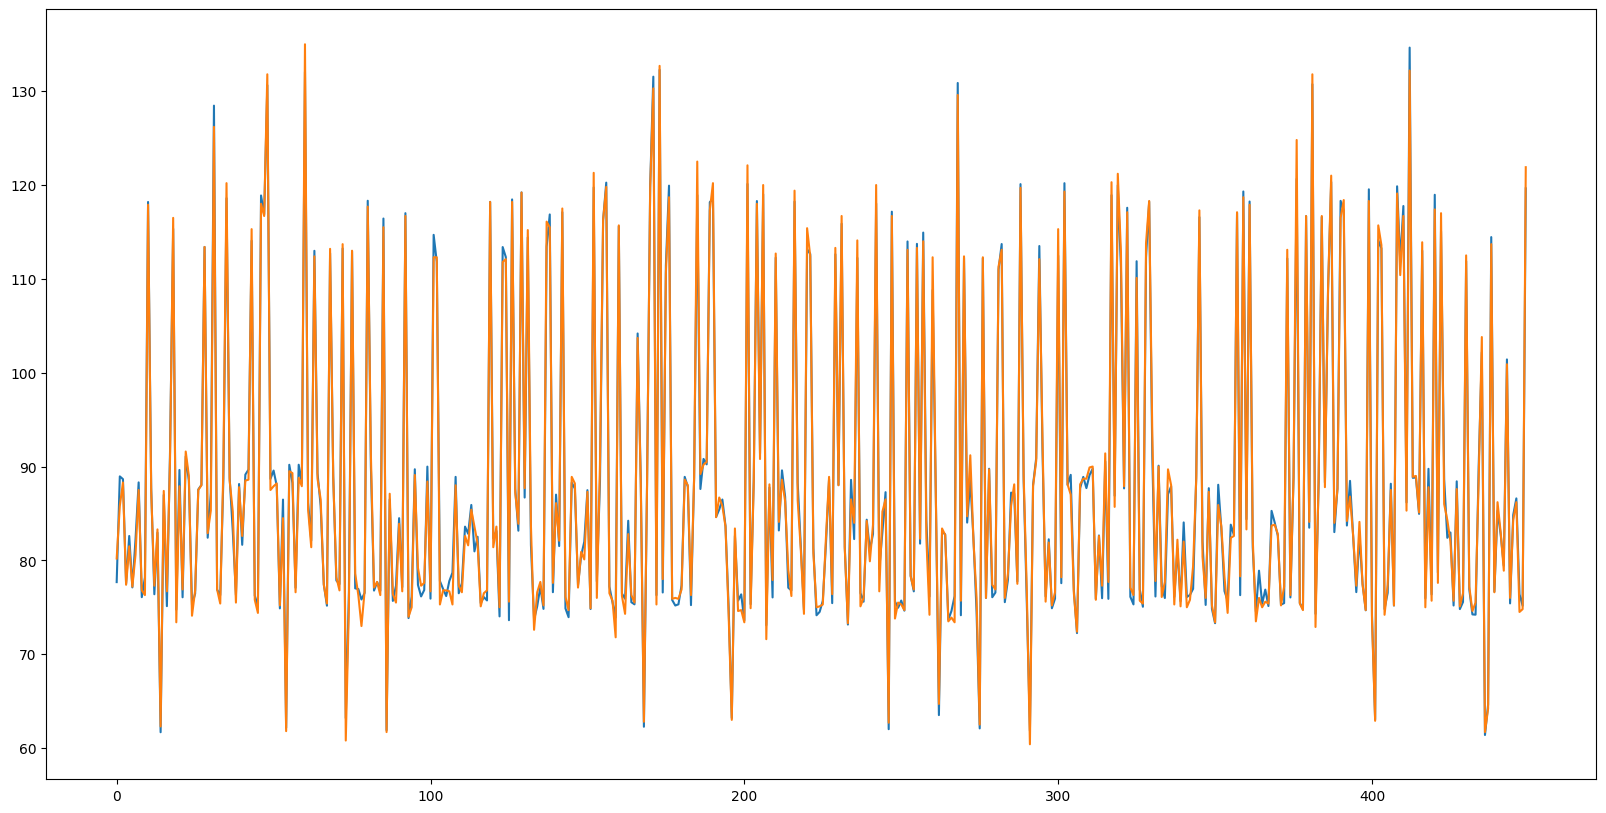

In [96]:
pred_y = xgb_rgr.predict(train_test_dict['test_x'])

print('mse :', np.mean(np.square(pred_y-train_test_dict['test_y'])))
plt.figure(figsize=(20,10))
plt.plot(pred_y[-500:-50])
plt.plot(train_test_dict['test_y'][-500:-50])


mse : 1.5842917086318047


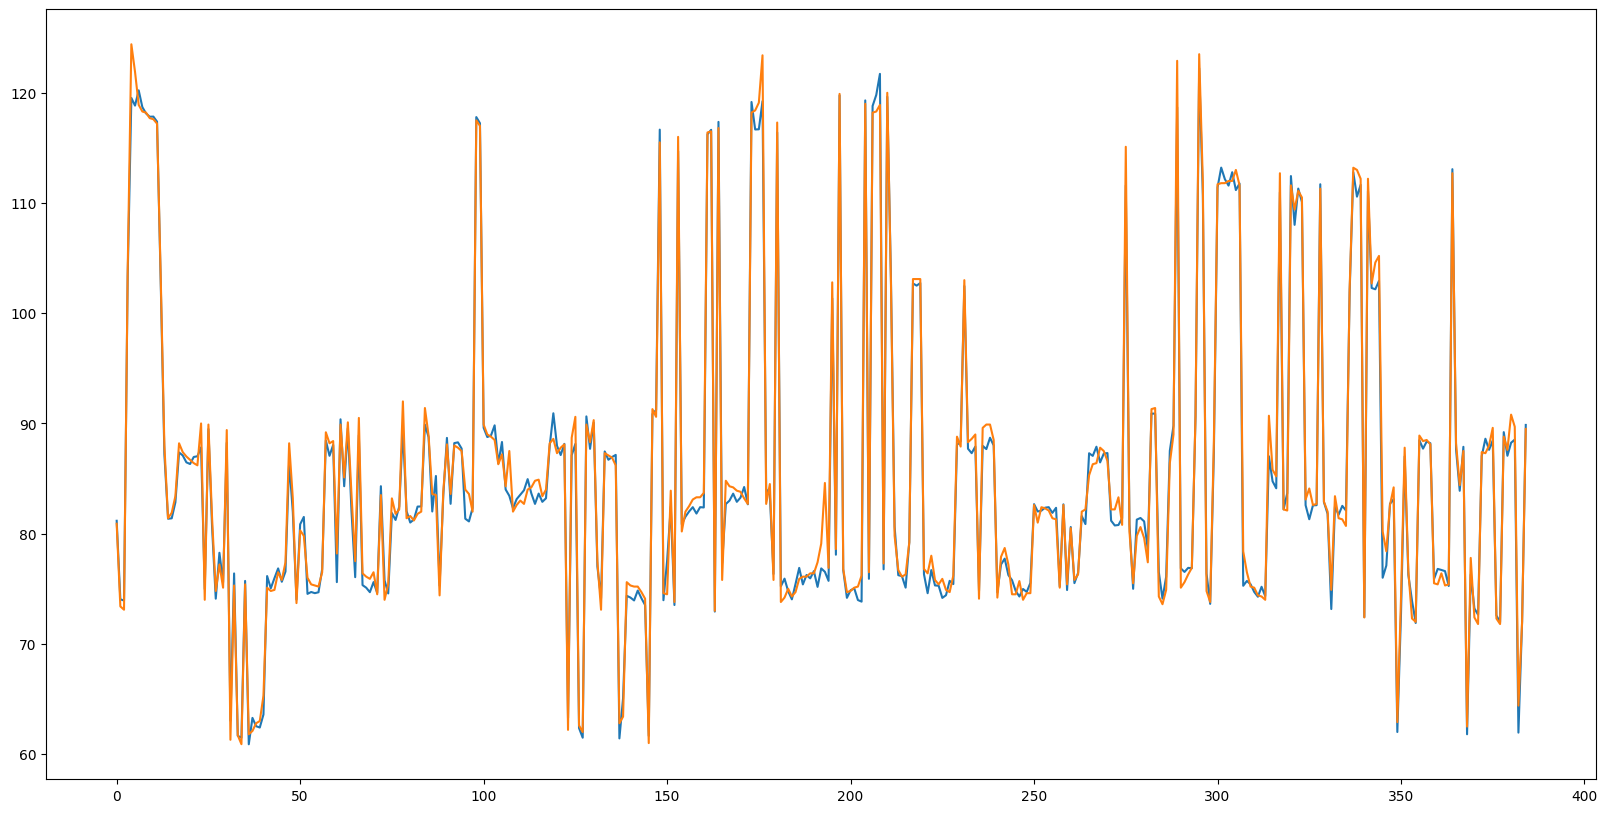

In [97]:
pred_y = xgb_rgr.predict(test_dict['test_x'])

print('mse :', np.mean(np.square(pred_y-test_dict['test_y'])))
plt.figure(figsize=(20,10))
plt.plot(pred_y)
plt.plot(test_dict['test_y'])

In [98]:
pred_df = pd.DataFrame(pred_y, columns=['pred'])
pred_df['real'] = test_dict['test_y']
pred_df = pd.concat([pred_df, test_dict['test_info'].reset_index(drop=True)], axis=1)
pred_df = pred_df.sort_values(['rcDate','rcNo']).reset_index(drop=True)
pred_df

pred  real     rcDate  rcNo  ord
0    63.037579  61.3 2023-08-05     1    1
1    61.661453  61.7 2023-08-05     1    2
2    61.482937  60.9 2023-08-05     2    1
3    60.892189  61.8 2023-08-05     2    2
4    63.286282  62.1 2023-08-05     2    4
..         ...   ...        ...   ...  ...
380  73.220810  72.4 2023-08-13    10    7
381  72.648941  71.8 2023-08-13    10    1
382  72.588959  72.3 2023-08-13    10    6
383  71.960487  71.8 2023-08-13    10    2
384  72.014091  72.0 2023-08-13    10    3

[385 rows x 5 columns]

In [104]:
pred_result = pd.DataFrame()

for rd in pred_df.rcDate.unique():
    prd_tmp = pred_df[pred_df['rcDate']==rd]
    for rn in prd_tmp.rcNo.unique():
        prd_tmp2 = prd_tmp[prd_tmp['rcNo']==rn]
        prd_tmp2.sort_values(['pred', 'real'], inplace=True)
        prd_tmp2['pred_org'] = prd_tmp2['pred'].rank(ascending=True).astype(int)
        pred_result = pd.concat([pred_result, prd_tmp2], axis=0)

In [106]:
pred_result.to_csv('result_pred.csv',index=False)

## real test

In [354]:
meet = 1 # 1: 서울, 2: 제주, 3: 부산
rc_no = list(range(1, 16))

## 경기 정보 불러오기
cnt = 0
for ym in rc_month:
    for rc in rc_no:
        try:
            detail_url = f'https://apis.data.go.kr/B551015/API4_2/raceResult_2?serviceKey=%2FpKtn0KFociUr9CM316rFT6o8sUrRD8yjSLuICPzxXarC8O%2FrUc1pjHc%2FCpuEwB5r4%2BimnNKYuJEjPKARyZCuw%3D%3D&pageNo=1&numOfRows=10000&meet={meet}&&rc_month={ym}&rc_no={rc}&_type=json'

            response = requests.get(detail_url)

            contents = response.text

            ## json을 DataFrame으로 변환하기 ##
            #문자열을 json으로 변경
            json_ob = json.loads(contents)

            # 필요한 내용만 꺼내기
            body = json_ob['response']['body']['items']['item']
        except Exception as e:
            print('e',e)
            continue

        # pandas import

        # Dataframe으로 만들기
        dataframe = pd.json_normalize(body)
        if 0 in dataframe.ord.unique():

            df_all = dataframe if cnt == 0 else pd.concat([df_all, dataframe], axis=0)
            cnt +=1

        else:
            continue

e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indices must be integers
e string indic

In [357]:
df_all.head(50)

age ageCond  buG1fAccTime  buG1fOrd  buG2fAccTime  buG2fOrd  buG3fAccTime  \
0     2      2세             0         0             0         0             0   
1     2      2세             0         0             0         0             0   
2     2      2세             0         0             0         0             0   
3     2      2세             0         0             0         0             0   
4     2      2세             0         0             0         0             0   
5     2      2세             0         0             0         0             0   
6     2      2세             0         0             0         0             0   
7     2      2세             0         0             0         0             0   
8     2      2세             0         0             0         0             0   
9     2      2세             0         0             0         0             0   
10    2      2세             0         0             0         0             0   
11    2      2세             0         0             0         0             0   
12    2      2세             0         0             0         0             0   
13    2      2세             0         0             0         0             0   
14    2      2세             0         0             0         0             0   
15    2      2세             0         0             0         0             0   
16    2      2세             0         0             0         0             0   
17    2      2세             0         0             0         0             0   
18    2      2세             0         0             0         0             0   
19    2      2세             0         0             0         0             0   
20    2      2세             0         0             0         0             0   
21    2      2세             0         0             0         0             0   
22    2      2세             0         0             0         0             0   
23    2      2세             0         0             0         0             0   
24    2      2세             0         0             0         0             0   
25    2      2세             0         0             0         0             0   
26    2      2세             0         0             0         0             0   
27    2      2세             0         0             0         0             0   
28    2      2세             0         0             0         0             0   
29    2      2세             0         0             0         0             0   
30    2      2세             0         0             0         0             0   
31    2      2세             0         0             0         0             0   
32    2      2세             0         0             0         0             0   
33    2      2세             0         0             0         0             0   
34    2      2세             0         0             0         0             0   
35    2      2세             0         0             0         0             0   
36    2      2세             0         0             0         0             0   
37    2      2세             0         0             0         0             0   
38    2      2세             0         0             0         0             0   
39    2      2세             0         0             0         0             0   
40    2      2세             0         0             0         0             0   
41    2      2세             0         0             0         0             0   
42    2      2세             0         0             0         0             0   
43    2      2세             0         0             0         0             0   
0     3    연령오픈             0         0             0         0             0   
1     4    연령오픈             0         0             0         0             0   
2     3    연령오픈             0         0             0         0             0   
3     3    연령오픈             0         0             0         0             0   
4     3    연령오픈             0      

In [353]:
pred_df = pd.DataFrame(pred_y, columns=['pred'])
pred_df['real'] = train_test_dict['test_y']
pred_df = pd.concat([pred_df, train_test_dict['test_info'].reset_index(drop=True)], axis=1)
pred_df = pred_df.sort_values(['rcDate','rcNo']).reset_index(drop=True)
pred_df

In [ ]:
for rd in pred_df.rcDate.unique():
    prd_tmp = pred_df[pred_df['rcDate']==rd]
    for rn in prd_tmp.rcNo.unique():
        prd_tmp2 = prd_tmp[prd_tmp['rcNo']==rn]
        prd_tmp2.sort_values(['pred', 'real'], inplace=True)
        prd_tmp2['pred_org'] = prd_tmp2['pred'].rank(ascending=True).astype(int)

In [ ]:
xgb_rgr = set_xgb()

xgb_params = {
      'max_depth': [2, 4, 6],
      'n_estimators': [100, 500, 1000],
      'colsample_bytree': [0.2, 0.6, 0.8],
      'min_child_weight': [3, 5, 7],
      'gamma': [0.3, 0.5, 0.7],
      'subsample': [0.4, 0.6, 0.8]
      }


rs_cv = RandomizedSearchCV(estimator=xgb_rgr, param_distributions=xgb_params,scoring = 'neg_mean_absolute_error', 
                           n_iter=25,n_jobs=-1, verbose=1)

rs_cv.fit(train_test_dict['train_x'], train_test_dict['train_y'])
print(rs_cv.best_params_)

In [ ]:


## 경기 정보 불러오기
cnt = 0

for i, hrno in enumerate(val_df.hrNo.values):
    try:

        detail_url =  f'https://apis.data.go.kr/B551015/API8_2/raceHorseInfo_2?serviceKey=%2FpKtn0KFociUr9CM316rFT6o8sUrRD8yjSLuICPzxXarC8O%2FrUc1pjHc%2FCpuEwB5r4%2BimnNKYuJEjPKARyZCuw%3D%3D&pageNo=1&numOfRows=10&hr_no={hrno}&meet={meet}&act_gubun=n&_type=json'
        response = requests.get(detail_url)

        contents = response.text

        ## json을 DataFrame으로 변환하기 ##
        #문자열을 json으로 변경
        json_ob = json.loads(contents)

        # 필요한 내용만 꺼내기
        body = json_ob['response']['body']['items']['item']
        dataframe = pd.json_normalize(body)
        cols = ['hrNo','ord1CntT','ord1CntY','ord2CntT','ord2CntY','ord3CntT','ord3CntY','rcCntT','rcCntY']

        # print(dataframe[cols])
    except Exception as e:
        print(hrno)
        print('e',e)



In [8]:
meet = 1 # 1: 서울, 2: 제주, 3: 부산
detail_url =  f'https://apis.data.go.kr/B551015/API8_2/raceHorseInfo_2?serviceKey=%2FpKtn0KFociUr9CM316rFT6o8sUrRD8yjSLuICPzxXarC8O%2FrUc1pjHc%2FCpuEwB5r4%2BimnNKYuJEjPKARyZCuw%3D%3D&pageNo=1&numOfRows=10&hr_no=0044916&meet={meet}&act_gubun=n&_type=json'
response = requests.get(detail_url)

contents = response.text

## json을 DataFrame으로 변환하기 ##
#문자열을 json으로 변경
json_ob = json.loads(contents)

# 필요한 내용만 꺼내기
body = json_ob['response']['body']['items']['item']
dataframe = pd.json_normalize(body)
cols = ['hrNo','ord1CntT','ord1CntY','ord2CntT','ord2CntY','ord3CntT','ord3CntY','rcCntT','rcCntY']
print(dataframe)

   birthday   chaksunT faHrName   faHrNo     hrLastAmt hrName     hrNo meet  \
0  20180321  177330000     언캡처드  0044993  38,897천원(개별)   마이티칩  0044916   서울   

   moHrName   moHrNo name  ord1CntT  ord1CntY  ord2CntT  ord2CntY  ord3CntT  \
0  BAGANARA  6129683   미국         4         0         1         1         3   

   ord3CntY owName    owNo rank  rating  rcCntT  rcCntY sex trName    trNo  
0         1    조병태  113005   외2       0      13       4   수    서홍수  070160  


In [19]:
val_df.track.unique()

array(['다습 (11%)', '다습 (12%)', '양호 (6%)', '양호 (9%)', '건조 (3%)',
       '다습 (10%)', '포화 (18%)', '양호 (5%)', '건조 (4%)', '건조 (5%)',
       '포화 (16%)', '불량 (20%)', '양호 (8%)', '다습 (14%)', '포화 (15%)',
       '포화 (17%)', '포화 (19%)', '다습 (13%)', '양호 (7%)', '건조 (2%)'],
      dtype=object)

In [36]:
df[['Wg', 'amt']] = df.wgHr.str.replace(')','').str.split('(',expand=True)

d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [45]:
df['amt'].replace('', np.nan, inplace=True)
df.amt.fillna(0, inplace=True)
df

age ageCond budam  buga1  buga2  buga3  chaksun1  chaksun2  chaksun3  \
0     3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
1     3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
2     3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
3     3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
4     3    연령오픈   별정A      0      0      0   8800000   5500000   3740000   
..  ...     ...   ...    ...    ...    ...       ...       ...       ...   
81    4    연령오픈   핸디캡      0      0      0  41250000  16500000  10500000   
82    6    연령오픈   핸디캡      0      0      0  41250000  16500000  10500000   
83    4    연령오픈   핸디캡      0      0      0  41250000  16500000  10500000   
84    5    연령오픈   핸디캡      0      0      0  41250000  16500000  10500000   
85    5    연령오픈   핸디캡      0      0      0  41250000  16500000  10500000   

    chaksun4  chaksun5  chulNo diffUnit  hrName     hrNo  ilsu jkName    jkNo  \
0    2420000   1540000       2        -  이스트임팩트  0042497     4   안토니오  080576   
1    2420000   1540000       7       16    선더챔프  0043132     4    함완식  080342   
2    2420000   1540000      10        5     대완구  0041986     4    김효정  080578   
3    2420000   1540000       8        ¾  스위트주스바  0043220     4    박을운  080339   
4    2420000   1540000       9        ½   쿨프린세스  0042278     4    권석원  080511   
..       ...       ...     ...      ...     ...      ...   ...    ...     ...   
81   3750000   3000000       1       1½   와일드삭스  0044287    49    정정희  080530   
82   3750000   3000000       2        5   캡틴브라보  0040452    49    김태희  080603   
83   3750000   3000000       7        1   그레이토르  0044685    49    장추열  080476   
84   3750000   3000000       5       2½    스프링꿈  0045121    49    이상규  080609   
85   3750000   3000000      11        8   쿨프린세스  0042278    49    김철호  080434   

   meet name  ord    owName    owNo  plcOdds prizeCond  rank  rating  \
0    서울   한국    1       김영구  110003   9999.9      R0~0  국6등급       0   
1    서울   한국    2       최동근  116045   9999.9      R0~0  국6등급       0   
2    서울   한국    3      김진영a  105040   9999.9      R0~0  국6등급       0   
3    서울   한국    4       정영식  104154   9999.9      R0~0  국6등급       0   
4    서울   한국    5       이용대  010641      1.0      R0~0  국6등급       0   
..  ...  ...  ...       ...     ...      ...       ...   ...     ...   
81   서울   한국    7       김창식  010352      3.5     R1~65  국3등급      53   
82   서울   한국    8       김용래  065012      4.1     R1~65  국3등급      63   
83   서울   한국    9       제일우  121020      2.5     R1~65  국3등급      58   
84   서울   미국   10  (주)디알엠씨티  114026     21.1     R1~65  국3등급      53   
85   서울   한국   11       이용대  010641     10.5     R1~65  국3등급      51   

      rcDate rcDay  rcDist rcName  rcNo  rcTime  seG1fAccTime  seG3fAccTime  \
0   20210129   금요일    1200     일반     2    72.8          60.1          36.0   
1   20210129   금요일    1200     일반     2    75.6          61.2          36.2   
2   20210129   금요일    1200     일반     2    76.5          63.2          38.1   
3   20210129   금요일    1200     일반     2    76.7          62.4          36.9   
4   20210129   금요일    1200     일반     2    76.7          62.7          37.2   
..       ...   ...     ...    ...   ...     ...           ...           ...   
81  20230701   토요일    1200     일반    10    73.1          59.9          35.8   
82  20230701   토요일    1200     일반    10    74.0          60.7          36.5   
83  20230701   토요일    1200     일반    10    74.2          60.8          36.5   
84  20230701   토요일    1200     일반    10    74.6          61.1          36.8   
85  20230701   토요일    1200     일반    10    76.0          61.7          37.1   

    seS1fAccTime  se_1cAccTime  se_2cAccTime  se_3cAccTime  se_4cAccTime sex  \
0           13.2           0.0           0.0          24.1          42.1   거   
1           13.8           0.0           0.0          24.4          42.3   수   
2           13.8           0.0           0.0          25.2      

In [46]:
df.amt.astype(int)

0      4
1      4
2      0
3     -1
4      6
      ..
81     6
82     7
83    13
84     9
85     6
Name: amt, Length: 23426, dtype: int32

In [28]:
df.weather.unique()

array(['맑음', '흐림', '비', '안개', '눈'], dtype=object)